In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.book import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [85]:
VA_accidents = pd.read_csv('VA_accidents_final.csv')

In [86]:
VA_accidents.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance', 'Description', 'Street', 'Side', 'City',
       'County', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Direction',
       'Wind_Speed', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Year', 'accidentPlaceOccurrence'],
      dtype='object')

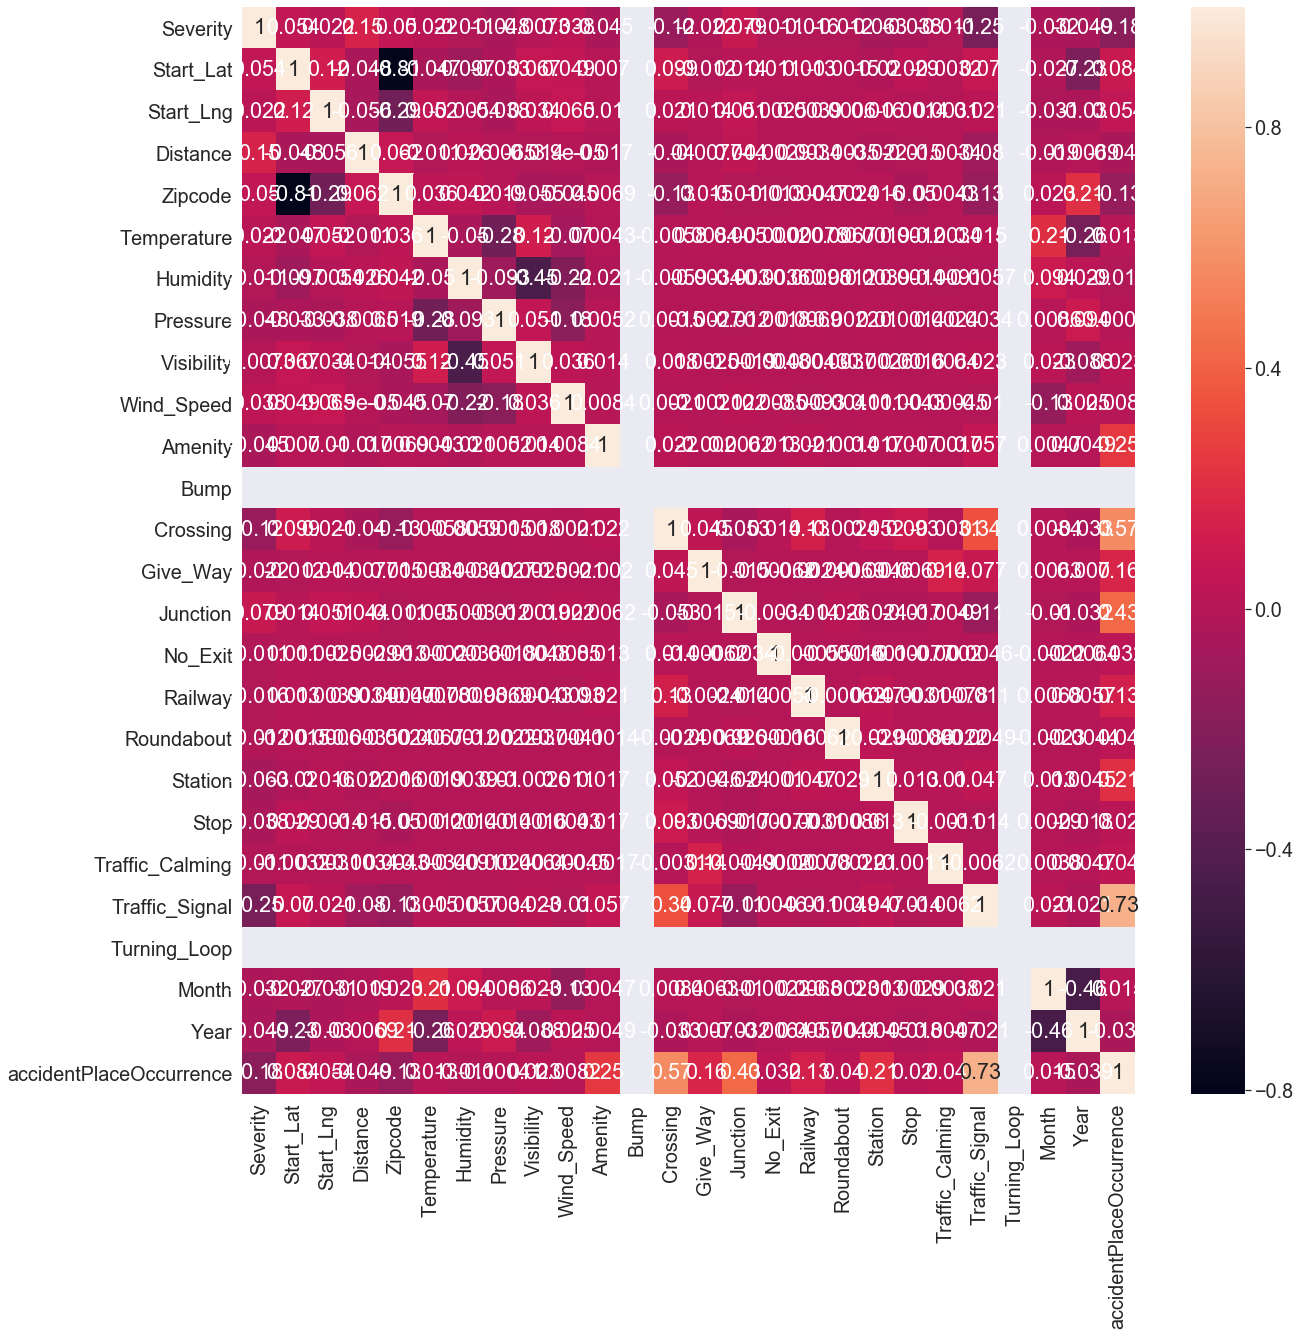

In [88]:
## Corelation analysis
corrmat = VA_accidents.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(VA_accidents[top_corr_features].corr(),annot=True)

In [89]:
VA_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57279 entries, 0 to 57278
Data columns (total 43 columns):
Source                     57279 non-null object
Severity                   57279 non-null int64
Start_Time                 57279 non-null object
End_Time                   57279 non-null object
Start_Lat                  57279 non-null float64
Start_Lng                  57279 non-null float64
Distance                   57279 non-null float64
Description                57279 non-null object
Street                     57279 non-null object
Side                       57279 non-null object
City                       57279 non-null object
County                     57279 non-null object
Zipcode                    57279 non-null int64
Timezone                   57279 non-null object
Airport_Code               57279 non-null object
Weather_Timestamp          57279 non-null object
Temperature                57279 non-null float64
Humidity                   57279 non-null float64
Pressu

In [90]:
#Encode String to Int Labels for easy training
le = LabelEncoder()
VA_accidents['Side'] = le.fit_transform(VA_accidents['Side'])
VA_accidents['Visibility'] = le.fit_transform(VA_accidents['Visibility'])
VA_accidents['Weather_Condition'] = le.fit_transform(VA_accidents['Weather_Condition'])
VA_accidents['Sunrise_Sunset'] = le.fit_transform(VA_accidents['Sunrise_Sunset'])
VA_accidents['Wind_Direction'] = le.fit_transform(VA_accidents['Wind_Direction'])
VA_accidents['Amenity'] = le.fit_transform(VA_accidents['Amenity'])
VA_accidents['Bump'] = le.fit_transform(VA_accidents['Bump'])
VA_accidents['Crossing'] = le.fit_transform(VA_accidents['Crossing'])
VA_accidents['Give_Way'] = le.fit_transform(VA_accidents['Give_Way'])
VA_accidents['Junction'] = le.fit_transform(VA_accidents['Junction'])
VA_accidents['No_Exit'] = le.fit_transform(VA_accidents['No_Exit'])
VA_accidents['Railway'] = le.fit_transform(VA_accidents['Railway'])
VA_accidents['Roundabout'] = le.fit_transform(VA_accidents['Roundabout'])
VA_accidents['Station'] = le.fit_transform(VA_accidents['Station'])
VA_accidents['Stop'] = le.fit_transform(VA_accidents['Stop'])
VA_accidents['Traffic_Calming'] = le.fit_transform(VA_accidents['Traffic_Calming'])
VA_accidents['Traffic_Signal'] = le.fit_transform(VA_accidents['Traffic_Signal'])
VA_accidents['Turning_Loop'] = le.fit_transform(VA_accidents['Turning_Loop'])
VA_accidents['Sunrise_Sunset'] = le.fit_transform(VA_accidents['Sunrise_Sunset'])

In [91]:
VA_accidents = VA_accidents.drop(columns=['Source','Start_Time','End_Time','Description','Street','City','County','Timezone',
                          'Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
                          'Month','Year','Weather_Timestamp'])

In [92]:
VA_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57279 entries, 0 to 57278
Data columns (total 28 columns):
Severity                   57279 non-null int64
Start_Lat                  57279 non-null float64
Start_Lng                  57279 non-null float64
Distance                   57279 non-null float64
Side                       57279 non-null int32
Zipcode                    57279 non-null int64
Temperature                57279 non-null float64
Humidity                   57279 non-null float64
Pressure                   57279 non-null float64
Visibility                 57279 non-null int64
Wind_Direction             57279 non-null int32
Wind_Speed                 57279 non-null float64
Weather_Condition          57279 non-null int32
Amenity                    57279 non-null int64
Bump                       57279 non-null int64
Crossing                   57279 non-null int64
Give_Way                   57279 non-null int64
Junction                   57279 non-null int64
No_Exit      

In [93]:
# Train Test Split

Prediction = VA_accidents['Severity']
Features = VA_accidents.drop(columns = ['Severity'])
    
X = Features
Y = Prediction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(42959, 27)
(42959,)
(14320, 27)
(14320,)


In [94]:
# Logistic Regresion
model = LogisticRegression()
# Model is learning relationship 
model.fit(X_train,Y_train)

# Model to make test predictions
y_pred = model.predict(X_test)


print(classification_report(Y_test,y_pred))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.72      0.63      0.67      7458
           3       0.59      0.76      0.66      5953
           4       0.05      0.00      0.00       901

    accuracy                           0.65     14320
   macro avg       0.27      0.28      0.27     14320
weighted avg       0.62      0.65      0.63     14320

Accuracy of the model
0.6454608938547486


In [95]:
# K Nearest Neighbrs
# Normalization
# Create the Scaler object
scaler = preprocessing.StandardScaler()
encoder = preprocessing.LabelEncoder()
VA_accidents['Severity'] = encoder.fit_transform(VA_accidents['Severity'])
y = np.array(VA_accidents['Severity'])
X = np.array(VA_accidents.drop(['Severity'], 1))

# Fitting data on the scaler object
X = scaler.fit_transform(X)

# KNN
accuracies =[]

k = range(1, 20)

for i in k:
    model3 = KNeighborsClassifier(n_neighbors= i)
    accuracy = cross_val_score(estimator = model3, X = X_train, y = Y_train, cv = 10)
    accu_knn = accuracy.mean()
    accuracies.append(accu_knn)    
print(accuracies)

max_value = 0
k = 0
bestk = 0
for i in accuracies:
    k = k+1
    if(max_value<i):
        max_value=i
print('Best Accuracy',max_value)

[0.625386373516948, 0.6075781558699898, 0.632509084425615, 0.6302739488034943, 0.6454273756544003, 0.6428905431321064, 0.6520861188697124, 0.6510614767176333, 0.6568114234765872, 0.6558334121397488, 0.6601632490877215, 0.6584407434487856, 0.6630264754158353, 0.6637947131631715, 0.6647258011009969, 0.6651682464742237, 0.665471146061226, 0.6653080250513227, 0.6659368417328994]
Best Accuracy 0.6659368417328994


In [96]:
# Decision Tree classifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,Y_train)
y_pred_knn = model3.predict(X_test)

print(classification_report(Y_test,y_pred_knn))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.81      0.81      0.81      7458
           3       0.79      0.79      0.79      5953
           4       0.49      0.49      0.49       901

    accuracy                           0.78     14320
   macro avg       0.42      0.42      0.42     14320
weighted avg       0.78      0.78      0.78     14320

Accuracy of the model
0.7828212290502793


In [97]:
# RandomForest Classifier
model4 = RandomForestClassifier()
model4.fit(X_train,Y_train)
y_pred_random = model4.predict(X_test)

print(classification_report(Y_test,y_pred_random))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.82      0.86      0.84      7458
           3       0.81      0.82      0.82      5953
           4       0.72      0.42      0.53       901

    accuracy                           0.81     14320
   macro avg       0.47      0.42      0.44     14320
weighted avg       0.81      0.81      0.81     14320

Accuracy of the model
0.8120111731843576


In [105]:
## Extra trees
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[1.27489095e-01 1.12166179e-01 1.19270877e-01 6.94619384e-02
 1.21419165e-01 6.48812988e-02 6.34197052e-02 6.51761787e-02
 2.10818628e-02 5.19806777e-02 5.41579594e-02 3.96859262e-02
 1.12550219e-03 0.00000000e+00 4.98725031e-03 3.08704495e-04
 7.72833061e-03 3.29558677e-05 4.52906742e-04 4.26546178e-05
 2.51296773e-03 1.87968630e-03 4.99630476e-05 5.16308338e-02
 0.00000000e+00 7.48823494e-03 1.15691463e-02]


In [106]:
data = VA_accidents[['Distance','Side','Traffic_Signal','Pressure','Humidity','Temperature',
                    'Wind_Direction']]

In [107]:
Prediction = VA_accidents['Severity']
data['Side'] = le.fit_transform(data['Side'])   
data['Wind_Direction'] = le.fit_transform(data['Wind_Direction']) 
X = data
Y = Prediction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(42959, 7)
(42959,)
(14320, 7)
(14320,)


In [108]:
# RandomForest Classifier
model5 = RandomForestClassifier()
model5.fit(X_train,Y_train)
y_pred_random = model5.predict(X_test)

print(classification_report(Y_test,y_pred_random))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.70      0.74      0.72      7494
           3       0.67      0.66      0.66      5975
           4       0.56      0.38      0.46       843

    accuracy                           0.68     14320
   macro avg       0.39      0.36      0.37     14320
weighted avg       0.68      0.68      0.68     14320

Accuracy of the model
0.6816340782122905


In [109]:
# FInding accidents count
Amenity_Count = VA_accidents['Amenity'].values.sum()
Bump_Count = VA_accidents['Bump'].values.sum()
Crossing_Count = VA_accidents['Crossing'].values.sum()
GiveWay_Count = VA_accidents['Give_Way'].values.sum()
Junction_Count = VA_accidents['Junction'].values.sum()
NoExit_Count = VA_accidents['No_Exit'].values.sum()
Railway_Count = VA_accidents['Railway'].values.sum()
Roundabout_Count = VA_accidents['Roundabout'].values.sum()
Station_Count = VA_accidents['Station'].values.sum()
TrafficCalming_Count = VA_accidents['Traffic_Calming'].values.sum()
TrafficSignal_Count = VA_accidents['Traffic_Signal'].values.sum()
TurningLoop_Count = VA_accidents['Turning_Loop'].values.sum()

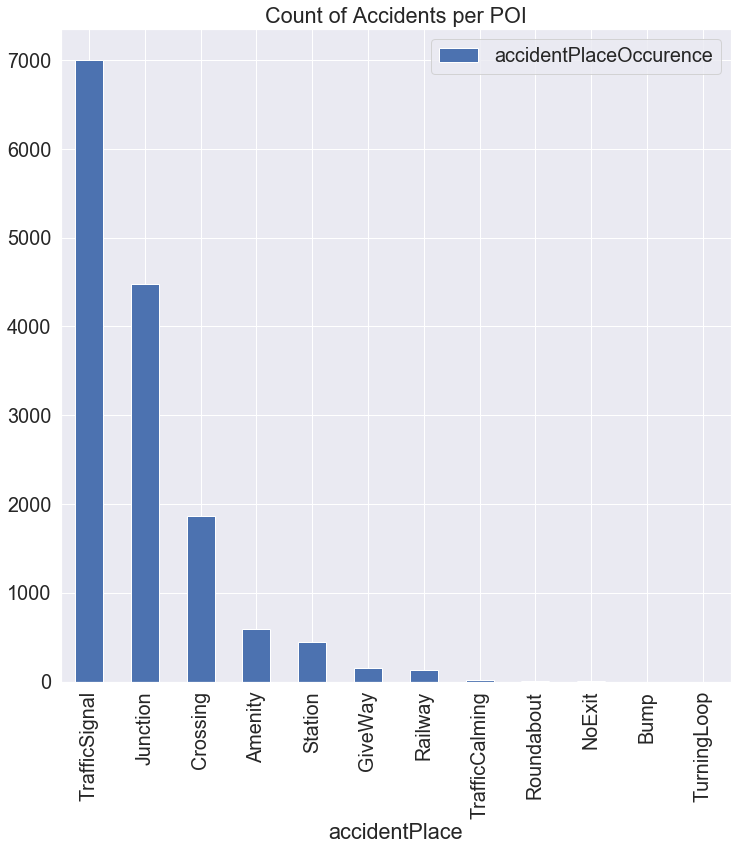

In [110]:
accidentlace = ['Amenity','Bump', 'Crossing','GiveWay','Junction','NoExit','Railway','Roundabout','Station','TrafficCalming','TrafficSignal','TurningLoop']
accidentplaceoccurence = [Amenity_Count,Bump_Count, Crossing_Count,GiveWay_Count,Junction_Count,NoExit_Count,Railway_Count,Roundabout_Count,Station_Count,TrafficCalming_Count,TrafficSignal_Count,TurningLoop_Count]
accidentData = {'accidentPlace':accidentlace, 'accidentPlaceOccurence':accidentplaceoccurence}
accidentDF = pd.DataFrame(accidentData)
accidentDF = accidentDF.sort_values('accidentPlaceOccurence', ascending = False)
accidentBar = accidentDF.plot.bar(y='accidentPlaceOccurence', x='accidentPlace', title = 'Count of Accidents per POI', 
                                  figsize=(12,12))